In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('D:\Impact Prediction\Incidents_Service.xlsx')

In [3]:
df.shape

(141712, 25)

In [4]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_id,change request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,...,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify,?,?
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,...,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,?,?
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,...,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,?,?


In [5]:
df.ID_status.value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: ID_status, dtype: int64

In [6]:
df.dtypes

ID                            object
ID_status                     object
active                          bool
count_reassign                 int64
count_opening                  int64
count_updated                  int64
ID_caller                     object
opened_by                     object
opened_time           datetime64[ns]
Created_by                    object
created_at            datetime64[ns]
updated_by                    object
updated_at            datetime64[ns]
type_contact                  object
location                      object
category_ID                   object
user_symptom                  object
impact                        object
Support_group                 object
support_incharge              object
Doc_knowledge                   bool
confirmation_check              bool
notify                        object
problem_id                    object
change request                object
dtype: object

# INSIGHT: 
                 ~majority of columns are object type. We have to create dummies before modeling.

In [7]:
df.describe()

,count_reassign,count_opening,count_updated
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 25 columns):
ID                    141712 non-null object
ID_status             141712 non-null object
active                141712 non-null bool
count_reassign        141712 non-null int64
count_opening         141712 non-null int64
count_updated         141712 non-null int64
ID_caller             141712 non-null object
opened_by             141712 non-null object
opened_time           141712 non-null datetime64[ns]
Created_by            141712 non-null object
created_at            141712 non-null datetime64[ns]
updated_by            141712 non-null object
updated_at            141712 non-null datetime64[ns]
type_contact          141712 non-null object
location              141712 non-null object
category_ID           141712 non-null object
user_symptom          141712 non-null object
impact                141712 non-null object
Support_group         141712 non-null object
support_incharg

In [9]:
for column in df.columns:
    print (column,": ",sum(df[column] == "?"))

ID :  0
ID_status :  0


C:\Users\asd\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


active :  0
count_reassign :  0
count_opening :  0
count_updated :  0
ID_caller :  0
opened_by :  0
opened_time :  0
Created_by :  0
created_at :  0
updated_by :  0
updated_at :  0
type_contact :  0
location :  0
category_ID :  0
user_symptom :  0
impact :  0
Support_group :  0
support_incharge :  0
Doc_knowledge :  0
confirmation_check :  0
notify :  0
problem_id :  139417
change request :  140721


# INSIGHT: 
                ~we have missing value problem in problem_id and change request columns.

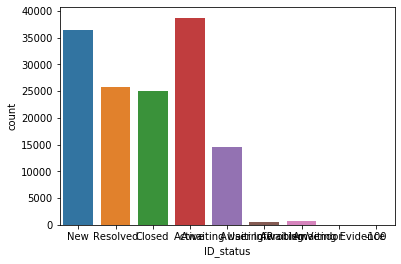

In [10]:
sns_plot=sns.countplot(df.ID_status)
fig = sns_plot.get_figure()
fig.savefig("ID_status.png")

In [11]:
df.ID_status.value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: ID_status, dtype: int64

In [12]:
df.active.value_counts()

True     116726
False     24986
Name: active, dtype: int64

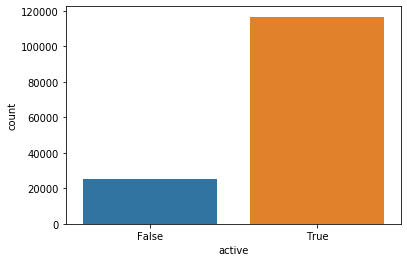

In [13]:
sns_plot=sns.countplot(df.active)
fig=sns_plot.get_figure()
fig.savefig("active.png")

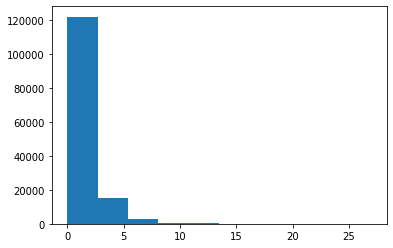

In [14]:
plt.hist(df.count_reassign)
plt.savefig('count_reassign.png')

In [15]:
import numpy as np
print(np.min(df.count_updated))
print(np.mean(df.count_updated))
print(np.max(df.count_updated))

0
5.080945862030033
129


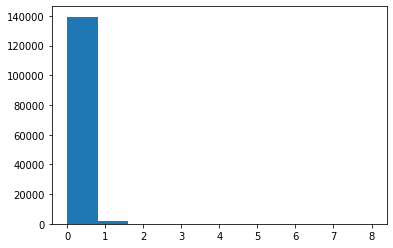

In [16]:
plt.hist(df.count_opening)
plt.savefig("count_opening.png")

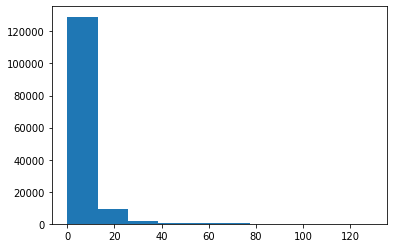

In [17]:
plt.hist(df.count_updated)
plt.savefig('count_updated.png')

In [18]:
df.ID_caller.value_counts()

Caller 1904    1454
Caller 290      791
Caller 4514     716
Caller 1441     322
Caller 298      293
               ... 
Caller 3104       2
Caller 1759       2
Caller 3219       2
Caller 2961       2
Caller 1978       2
Name: ID_caller, Length: 5244, dtype: int64

In [19]:
df.opened_by.value_counts()

Opened by  17     46301
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  160        3
Opened by  80         3
Opened by  440        3
Opened by  447        3
Opened by  528        3
Name: opened_by, Length: 207, dtype: int64

In [20]:
df.Created_by.value_counts()

Created by 10     77299
Created by 13      4511
Created by 62      3943
Created by 52      3551
Created by 34      3468
                  ...  
Created by 209        3
Created by 60         3
Created by 73         3
Created by 191        3
Created by 194        3
Name: Created_by, Length: 185, dtype: int64

In [21]:
df.updated_by.value_counts()

Updated by 908    36162
Updated by 44     12644
Updated by 60      7009
Updated by 429     4169
Updated by 859     2560
                  ...  
Updated by 312        1
Updated by 516        1
Updated by 72         1
Updated by 167        1
Updated by 824        1
Name: updated_by, Length: 846, dtype: int64

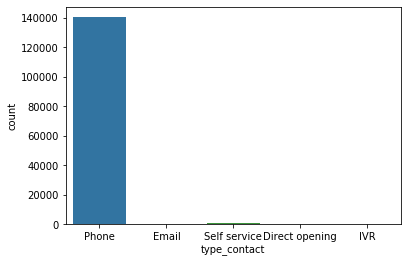

In [22]:
sns_plot=sns.countplot(df.type_contact)
fig=sns_plot.get_figure()
fig.savefig('type_contact.png')

In [23]:
df.type_contact.value_counts()

Phone             140462
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: type_contact, dtype: int64

In [24]:
df.location.value_counts()

Location 204    31766
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 137        3
Location 211        3
Location 132        2
Location 166        2
Location 31         2
Name: location, Length: 224, dtype: int64

In [25]:
df.category_ID.value_counts()

Category 26    18531
Category 42    15977
Category 53    15968
Category 46    13324
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Category 61     5168
Category 24     4561
Category 34     3946
Category 40     3760
Category 45     3619
Category 51     2390
Category 28     2256
Category 35     2037
Category 44     1798
Category 19     1592
Category 13      994
Category 43      858
Category 55      801
Category 17      512
Category 22      420
Category 56      322
Category 38      290
Category 8       264
Category 7       207
Category 33      160
Category 54      139
Category 50       93
Category 31       92
Category 63       78
Category 2        77
Category 21       69
Category 47       50
Category 59       42
Category 41       36
Category 29       32
Category 5        31
Category 25       30
Category 62       25
Category 10       24
Category 4        22
Category 52       16
Category 30       15
Category 48  

In [26]:
df.user_symptom.value_counts()

Symptom 491    84949
Symptom 534     5559
Symptom 387     2583
Symptom 4       2532
Symptom 116     2394
               ...  
Symptom 229        1
Symptom 184        1
Symptom 448        1
Symptom 313        1
Symptom 415        1
Name: user_symptom, Length: 525, dtype: int64

In [27]:
df.impact.value_counts()

2 - Medium    134335
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

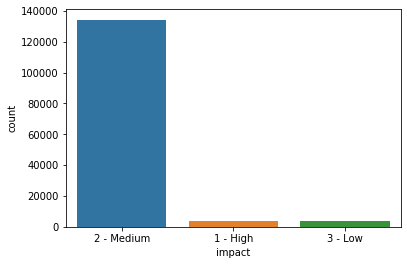

In [28]:
sns_plot=sns.countplot(df.impact)
fig=sns_plot.get_figure()
fig.savefig('impact.png')

# INSIGHT: 
                ¬we have data imbalanced problem here, we have to fix it before modeling

In [29]:
df.Support_group.value_counts()

Group 70    57687
Group 25     7679
Group 24     6752
Group 20     6170
Group 39     4728
            ...  
Group 41        3
Group 38        2
Group 4         1
Group 11        1
Group 16        1
Name: Support_group, Length: 78, dtype: int64

In [30]:
df.support_incharge.value_counts()

Resolver 17     38086
Resolver 13      8802
Resolver 194     3515
Resolver 57      3144
Resolver 69      2983
                ...  
Resolver 199        1
Resolver 38         1
Resolver 129        1
Resolver 67         1
Resolver 146        1
Name: support_incharge, Length: 234, dtype: int64

In [31]:
df.Doc_knowledge.value_counts()

False    116349
True      25363
Name: Doc_knowledge, dtype: int64

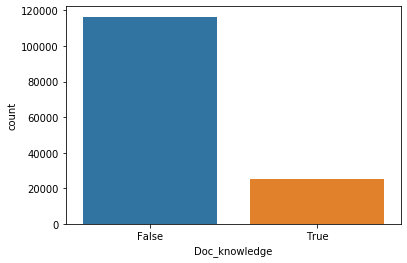

In [32]:
sns_plot=sns.countplot(df.Doc_knowledge)
fig=sns_plot.get_figure()
fig.savefig('Doc_knowledge.png')

In [33]:
df.confirmation_check.value_counts()

False    100740
True      40972
Name: confirmation_check, dtype: int64

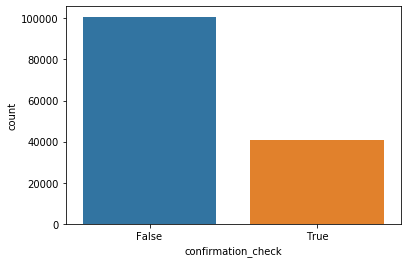

In [34]:
sns_plot=sns.countplot(df.confirmation_check)
fig=sns_plot.get_figure()
fig.savefig('confirmation-check.png')

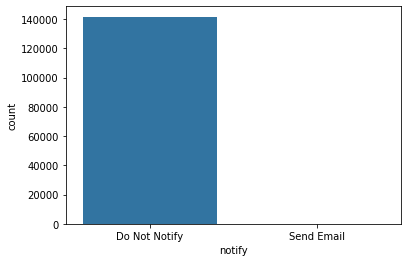

In [35]:
sns_plot=sns.countplot(df.notify)
fig=sns_plot.get_figure()
fig.savefig('notify.png')

In [36]:
df.notify.value_counts()

Do Not Notify    141593
Send Email          119
Name: notify, dtype: int64

In [37]:
df.problem_id.value_counts()

?                  139417
Problem ID  14        184
Problem ID  2         147
Problem ID  52         82
Problem ID  239        48
                    ...  
Problem ID  33          1
Problem ID  181         1
Problem ID  11          1
Problem ID  88          1
Problem ID  195         1
Name: problem_id, Length: 253, dtype: int64

Inights: Almost all the records of problem id column are question marks. we may need help of domain knowledge expert.

In [38]:
df['change request'].value_counts()

?             140721
CHG0000132        20
CHG0001230        20
CHG0000047        18
CHG0001656        17
               ...  
CHG0000230         2
CHG0001720         1
CHG0001437         1
CHG0000530         1
CHG0001829         1
Name: change request, Length: 182, dtype: int64

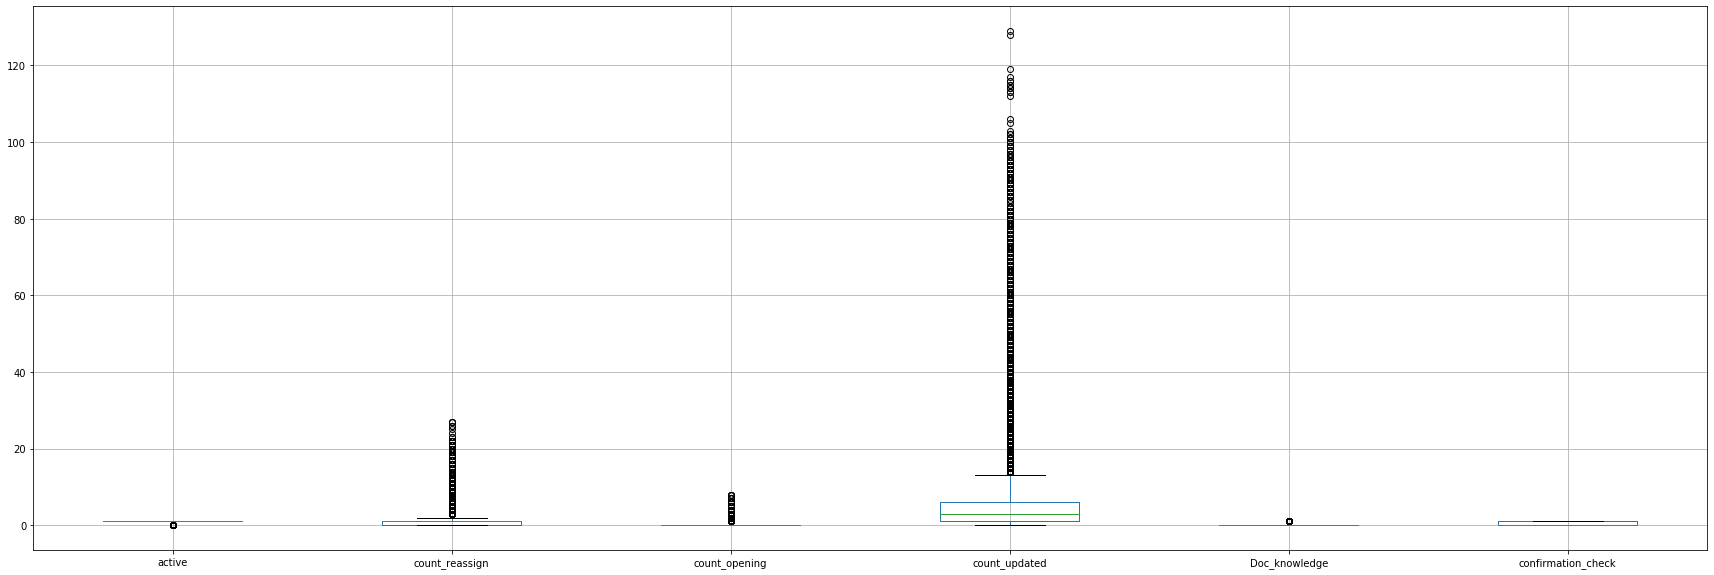

In [39]:
df.boxplot(return_type='axes',figsize=(30,10))
plt.savefig('boxplot.png')

# INSIGHT:
                ¬we might have a chance of having some outliers in count_updated column

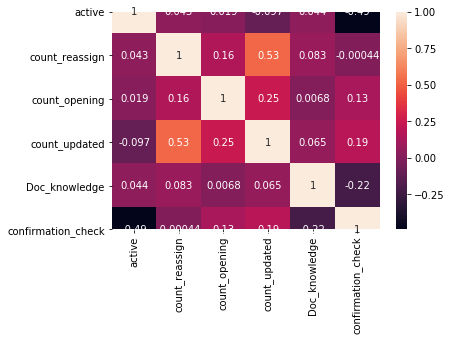

In [40]:
sns_plot=sns.heatmap(df.corr(),annot=True)
fig=sns_plot.get_figure()
fig.savefig('heatmap.png')

# Insight: 
there is no high correlation between features.

In [41]:
df.impact.value_counts()

2 - Medium    134335
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

# INSIGHT:
                ~we have data imbalanced problem here, we need to solve it.

In [42]:
df.problem_id.value_counts()

?                  139417
Problem ID  14        184
Problem ID  2         147
Problem ID  52         82
Problem ID  239        48
                    ...  
Problem ID  33          1
Problem ID  181         1
Problem ID  11          1
Problem ID  88          1
Problem ID  195         1
Name: problem_id, Length: 253, dtype: int64

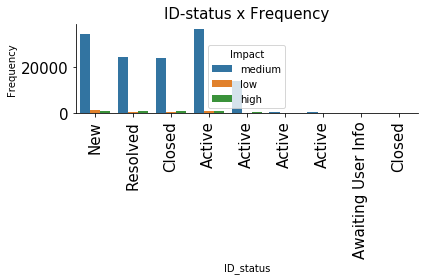

In [43]:
# Impact of Id_status on Target
fig,ax = plt.subplots()
sns.countplot(df['ID_status'], data = df, hue = 'impact', ax = ax)
sns.despine(ax = ax)
ax.set_xlabel('ID_status', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_title('ID-status x Frequency', fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(df['ID_status'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title="Impact",labels=["medium","low","high"])

In [44]:
df.active.value_counts()

True     116726
False     24986
Name: active, dtype: int64

In [45]:
import numpy as np
np.max(df.count_reassign)

27

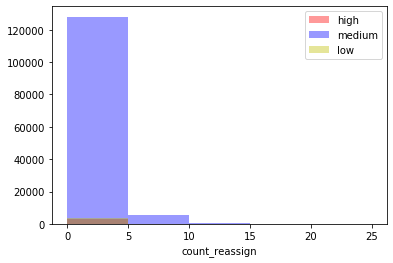

In [46]:
# Impact of count_reassign on Target
fig,ax1 = plt.subplots()

#Age
bins = range(0,30,5)
sns.distplot(df.count_reassign[df.impact=='1 - High'],color='r',bins=bins,label="high",ax=ax1,kde=False)
sns.distplot(df.count_reassign[df.impact=='2 - Medium'],color='b',bins=bins,label="medium",ax=ax1,kde=False)
sns.distplot(df.count_reassign[df.impact=='3 - Low'],color='y',bins=bins,label="low",ax=ax1,kde=False)
plt.legend()
plt.savefig('count_reassign_target.png')

# INSIGHT:
                ~count_reassign might be one important feature specially in range of 0-5.

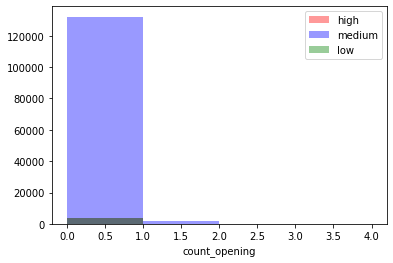

In [47]:
# Impact of count_opening on Target
fig,ax1 = plt.subplots()

#Age
bins = range(0,5,1)
sns.distplot(df.count_opening[df.impact=='1 - High'],color='r',bins=bins,label="high",ax=ax1,kde=False)
sns.distplot(df.count_opening[df.impact=='2 - Medium'],color='b',bins=bins,label="medium",ax=ax1,kde=False)
sns.distplot(df.count_opening[df.impact=='3 - Low'],color='g',bins=bins,label="low",ax=ax1,kde=False)
plt.legend()

# INSIGHT:
                ~count_opening might be one important feature.

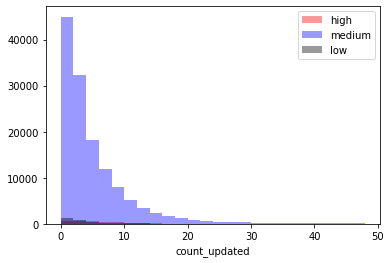

In [48]:
# Impact of count_updated on Target
fig,ax1 = plt.subplots()

#Age
bins = range(0,50,2)
sns.distplot(df.count_updated[df.impact=='1 - High'],color='r',bins=bins,label="high",ax=ax1,kde=False)
sns.distplot(df.count_updated[df.impact=='2 - Medium'],color='b',bins=bins,label="medium",ax=ax1,kde=False)
sns.distplot(df.count_updated[df.impact=='3 - Low'],color='black',bins=bins,label="low",ax=ax1,kde=False)
plt.legend()
plt.savefig('count_updated_target.png')

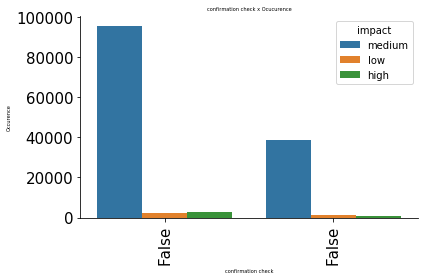

In [49]:
# Impact of confirmation check on Target
fig,ax2 = plt.subplots()
sns.countplot(x='confirmation_check', data = df, hue = 'impact', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('confirmation check', fontsize=5)
ax2.set_ylabel('Occurence', fontsize=5)
ax2.set_title('confirmation check x Ocucurence', fontsize=5)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(df['confirmation_check'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title="impact",labels=["medium","low","high"])
plt.savefig('confirmation_check_target.png')

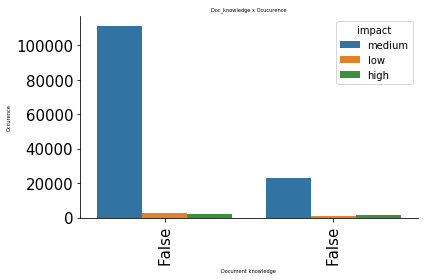

In [50]:
# Impact of confirmation check on Target
fig,ax2 = plt.subplots()
sns.countplot(x='Doc_knowledge', data = df, hue = 'impact', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Document knowledge', fontsize=5)
ax2.set_ylabel('Occurence', fontsize=5)
ax2.set_title('Doc_knowledge x Ocucurence', fontsize=5)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(df['confirmation_check'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title="impact",labels=["medium","low","high"])
plt.savefig('confirmation_check_target.png')

In [51]:
df.loc[df['ID_status']==-100,"ID_status"]='hundred'





# INSIGHT: 
                ~countt_updated is one more important feature.    

In [52]:
# categorical_columns=['ID_status','active','ID_caller','opened_by','Created_by','updated_by','type_contact',
#                       'location','category_ID','user_symptom','Support_group','support_incharge','Doc_knowledge',
#                          'confirmation_check','notify','ID']
# from sklearn.preprocessing import LabelEncoder 
# le=LabelEncoder()
# df1 = df[['ID_status','active','ID_caller','opened_by','Created_by','updated_by','type_contact',
#                       'location','category_ID','user_symptom','Support_group','support_incharge','Doc_knowledge',
#                          'confirmation_check','notify','ID']].apply(le.fit_transform)
# # df['ID_status']=df[['ID_status']].apply(ke.fit_transform)

In [53]:
# df1.head()

In [54]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)

In [55]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_id,change request
0,0,6,1,0,0,0,1462,200,0,151,...,46,501,1,47,73,1,0,0,0,0
1,0,7,1,0,0,3,1462,200,0,151,...,46,501,1,47,73,1,0,0,0,0
2,0,5,0,0,0,4,1462,200,0,151,...,46,501,1,47,73,1,0,0,0,0
3,1,0,1,1,0,1,1462,120,1,58,...,30,352,1,15,167,1,0,0,0,0
4,1,0,1,1,0,2,1462,120,1,58,...,30,352,1,15,167,1,0,0,0,0


In [56]:
df1=df.drop(columns=['problem_id','change request','ID'],axis=1)

In [57]:
df1.corr()

,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,...,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify
ID_status,1.000000,-0.165452,-0.158993,-0.077673,-0.069330,-0.003875,-0.025942,0.096369,-0.038446,0.088138,...,-0.005828,0.018558,-0.016705,0.014369,-0.004543,0.078681,-0.044177,-0.067473,0.408274,0.017835
active,-0.165452,1.000000,0.043323,0.019083,-0.097288,0.004318,0.005342,-0.046417,0.040615,-0.046576,...,0.009973,0.003046,0.004053,-0.015211,-0.021294,-0.040518,-0.003175,0.043711,-0.488946,-0.009601
count_reassign,-0.158993,0.043323,1.000000,0.160193,0.528541,-0.000986,0.002638,-0.111049,0.042356,-0.093435,...,0.000757,0.019564,-0.049027,-0.010989,-0.021097,-0.073989,-0.032259,0.082968,-0.000441,-0.005955
count_opening,-0.077673,0.019083,0.160193,1.000000,0.247489,-0.006726,-0.006782,-0.006502,-0.012330,0.005128,...,-0.003586,-0.023207,0.012547,-0.004071,-0.003977,-0.014818,-0.008156,0.006847,0.131248,-0.003065
count_updated,-0.069330,-0.097288,0.528541,0.247489,1.000000,0.009691,-0.002657,-0.081730,0.053401,-0.077900,...,0.017869,-0.007157,-0.003531,-0.025887,-0.015241,-0.103041,0.040389,0.065026,0.185979,-0.006147
ID_caller,-0.003875,0.004318,-0.000986,-0.006726,0.009691,1.000000,0.053115,-0.009037,-0.017684,-0.005384,...,0.011268,0.034555,-0.015916,-0.003151,-0.006123,-0.012773,-0.028421,0.004471,-0.008350,-0.001060
opened_by,-0.025942,0.005342,0.002638,-0.006782,-0.002657,0.053115,1.000000,-0.145899,0.227737,-0.098602,...,0.013632,0.003139,-0.012207,-0.012798,-0.081875,-0.006397,0.048312,0.160563,-0.047642,-0.000843
opened_time,0.096369,-0.046417,-0.111049,-0.006502,-0.081730,-0.009037,-0.145899,1.000000,-0.215133,0.602407,...,0.091133,-0.045641,0.016988,0.035109,-0.054871,0.029895,-0.013537,-0.617276,0.241242,-0.030690
Created_by,-0.038446,0.040615,0.042356,-0.012330,0.053401,-0.017684,0.227737,-0.215133,1.000000,-0.346581,...,0.035192,0.010119,0.025848,-0.040206,0.024168,-0.259980,0.167417,0.191718,-0.078456,-0.011733
created_at,0.088138,-0.046576,-0.093435,0.005128,-0.077900,-0.005384,-0.098602,0.602407,-0.346581,1.000000,...,0.048045,-0.035148,0.016321,0.044643,-0.034249,0.172706,-0.073380,-0.413206,0.160898,0.005697


In [58]:
df1.shape

(141712, 22)

In [59]:
x=df1.drop('impact',axis=1)
y=df1['impact']

In [60]:
y=np.array(y)
y=y.reshape(-1,1)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [62]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver = 'lbfgs')

LogReg.fit(x_train,y_train)

C:\Users\asd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\asd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [64]:
LogReg_predict_train=LogReg.predict(x_train)
print('Train Accuracy:' ,accuracy_score(y_train,LogReg_predict_train))

Train Accuracy: 0.9484250544681526


In [65]:
print(classification_report(y_train,LogReg_predict_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2784
           1       0.95      1.00      0.97    107522
           2       0.00      0.00      0.00      3063

    accuracy                           0.95    113369
   macro avg       0.32      0.33      0.32    113369
weighted avg       0.90      0.95      0.92    113369



C:\Users\asd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


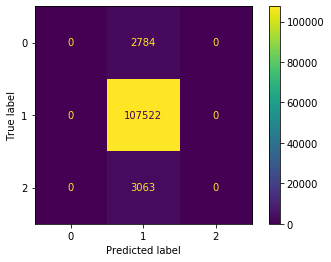

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, x_train,y_train) 
plt.show()

In [67]:
LogReg_predict_test=LogReg.predict(x_test)

In [68]:
LogReg_ScoreAccuracy= accuracy_score(y_test, LogReg_predict_test)
LogReg_ScoreAccuracy

0.9460184172458809

# INSIGHT:
                 ~we can see that accuracy is 33% but we can not deploy this model because of zero recall and precision for high impact and low impact incident.

In [69]:
print(classification_report(y_test,LogReg_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       707
           1       0.95      1.00      0.97     26813
           2       0.00      0.00      0.00       823

    accuracy                           0.95     28343
   macro avg       0.32      0.33      0.32     28343
weighted avg       0.89      0.95      0.92     28343



C:\Users\asd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# INSIGHT:
                ~we can see that precision and recall for low impact and high impact is zero due to data imbalance problem.

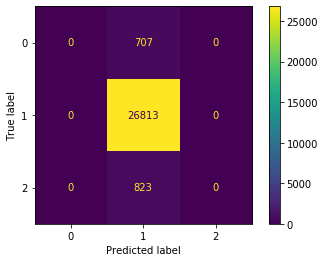

In [70]:
plot_confusion_matrix(LogReg,x_test,y_test)
plt.show()

In [71]:
# resampling the data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(x, y)
print (pd.Series(y_smote).value_counts())

2    134335
1    134335
0    134335
dtype: int64


In [72]:
x_smote.shape

(403005, 21)

In [73]:
y_smote.shape

(403005,)

In [74]:
y_smote=np.array(y_smote)
y_smote=y_smote.reshape(-1,1)

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote,random_state=1,test_size=0.2)

In [76]:
print(X_train.shape)

(322404, 21)


In [77]:
print(X_test.shape)

(80601, 21)


In [78]:
print(Y_train.shape)

(322404, 1)


In [79]:
print(Y_test.shape)

(80601, 1)


In [80]:
LogReg.fit(X_train,Y_train)

C:\Users\asd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\asd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [81]:
Log_predict_train=LogReg.predict(X_train)
print("Train Accuracy:",accuracy_score(Y_train,Log_predict_train))

Train Accuracy: 0.4824133695611717


In [82]:
print(classification_report(Y_train,Log_predict_train))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52    107263
           1       0.41      0.32      0.36    107613
           2       0.50      0.60      0.55    107528

    accuracy                           0.48    322404
   macro avg       0.48      0.48      0.48    322404
weighted avg       0.48      0.48      0.48    322404



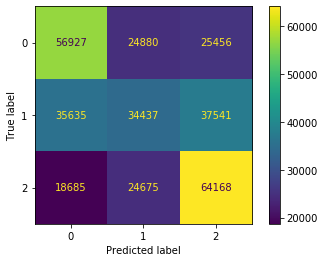

In [83]:
plot_confusion_matrix(LogReg, X_train,Y_train) 
plt.show()

In [84]:
Log_predict=LogReg.predict(X_test)

In [85]:
Log_ScoreAccuracy= accuracy_score(Y_test, Log_predict)
Log_ScoreAccuracy

0.48608578057344204

In [86]:
print(classification_report(Y_test,Log_predict))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52     27072
           1       0.41      0.33      0.36     26722
           2       0.51      0.60      0.55     26807

    accuracy                           0.49     80601
   macro avg       0.48      0.49      0.48     80601
weighted avg       0.48      0.49      0.48     80601



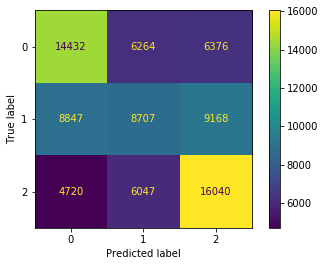

In [87]:
plot_confusion_matrix(LogReg, X_test,Y_test) 
plt.show()

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
DT_predict_train=DT.predict(X_train)
print("Train Accuracy:",accuracy_score(Y_train,DT_predict_train))

Train Accuracy: 0.9999875932060396


In [90]:
print(classification_report(Y_train,DT_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107263
           1       1.00      1.00      1.00    107613
           2       1.00      1.00      1.00    107528

    accuracy                           1.00    322404
   macro avg       1.00      1.00      1.00    322404
weighted avg       1.00      1.00      1.00    322404



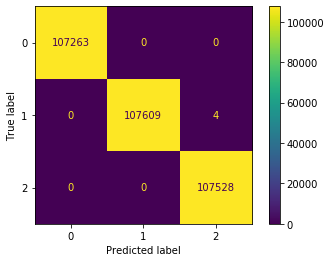

In [91]:
plot_confusion_matrix(DT,X_train,Y_train)

In [92]:
pred_Dt=DT.predict(X_test)
pred_Dt

array([0, 2, 1, ..., 2, 2, 2])

In [93]:
Dt_accuracyscore=accuracy_score(Y_test,pred_Dt)
Dt_accuracyscore

0.9821838438729048

In [94]:
print(classification_report(Y_test,pred_Dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27072
           1       0.98      0.97      0.98     26722
           2       0.98      0.99      0.99     26807

    accuracy                           0.98     80601
   macro avg       0.98      0.98      0.98     80601
weighted avg       0.98      0.98      0.98     80601



# INSIGHT:
                ~surely we can deploy this model because we got 98% accuracy.

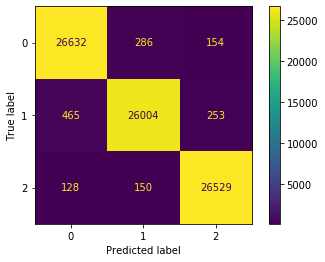

In [95]:
plot_confusion_matrix(DT, X_test,Y_test) 
plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
import pickle
Final_Model= RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=63,criterion="entropy")
Final_Model.fit(X_train,Y_train)
pickle.dump(Final_Model,open('Model.pkl','wb'))

C:\Users\asd\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [97]:
Final_Model.classes_

array([0, 1, 2])

In [98]:
Final_Model.n_classes_ # Number of levels in class labels 

3

In [99]:
pred_RF_test=Final_Model.predict(X_train)
print("Accuracy Score:",accuracy_score(Y_train,pred_RF_test))

Accuracy Score: 0.9999844915075495


In [100]:
print(classification_report(Y_train,pred_RF_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107263
           1       1.00      1.00      1.00    107613
           2       1.00      1.00      1.00    107528

    accuracy                           1.00    322404
   macro avg       1.00      1.00      1.00    322404
weighted avg       1.00      1.00      1.00    322404



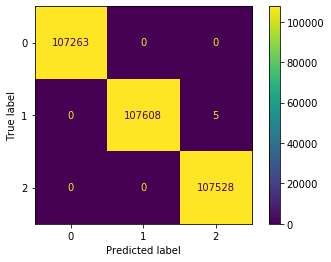

In [101]:
plot_confusion_matrix(Final_Model,X_train,Y_train)
plt.show()

In [102]:
pred_RF=Final_Model.predict(X_test)
pred_RF

array([0, 2, 1, ..., 2, 2, 1])

In [103]:
accuracy_RF=accuracy_score(Y_test,pred_RF)
accuracy_RF

0.9950993163856527

In [104]:
print(classification_report(Y_test,pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27072
           1       0.99      0.99      0.99     26722
           2       0.99      1.00      1.00     26807

    accuracy                           1.00     80601
   macro avg       1.00      1.00      1.00     80601
weighted avg       1.00      1.00      1.00     80601



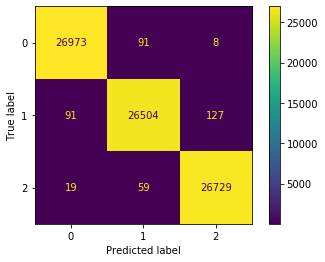

In [105]:
plot_confusion_matrix(Final_Model,X_test,Y_test)

In [106]:
from flask import Flask, render_template, request, redirect, url_for

model=pickle.load(open('Model.pkl','rb'))